In [1]:
import numpy as np
import math
import csv
from proj1_helpers import *
from Hadrien import *
from ML_methods import *
from features_engineering import *
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

In [2]:
y, tx, ids = load_csv_data("data_csv/train.csv", sub_sample=True)

In [3]:
print("y has shape {0}".format(y.shape))
print("X has shape {0}".format(tx.shape))

y has shape (5000,)
X has shape (5000, 30)


### Spy NAN values
White is NAN, black is finite value

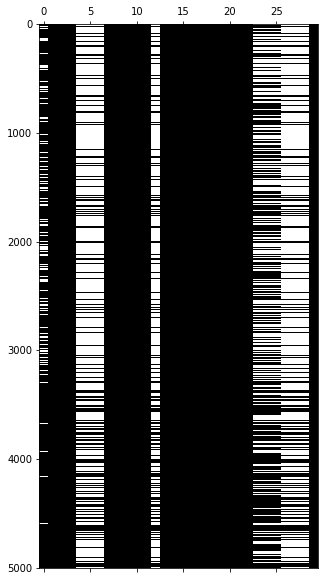

In [4]:
NAN_values_overview_matrix(tx, y)

divide into 4 depending on the feature 22

In [17]:
tx0, y0, tx1, y1, tx2, y2, tx3, y3 = separate_PRI_jet_num(tx, y)
print("tx0 has shape {tx0} and y0 has shape {y0}".format(tx0=tx0.shape, y0=y0.shape))
print("tx1 has shape {tx1} and y1 has shape {y1}".format(tx1=tx1.shape, y1=y1.shape))
print("tx2 has shape {tx2} and y2 has shape {y2}".format(tx2=tx2.shape, y2=y2.shape))
print("tx3 has shape {tx3} and y3 has shape {y3}".format(tx3=tx3.shape, y3=y3.shape))

(5000,)
tx0 has shape (1985, 30) and y0 has shape (1985,)
tx1 has shape (1540, 30) and y1 has shape (1540,)
tx2 has shape (1043, 30) and y2 has shape (1043,)
tx3 has shape (432, 30) and y3 has shape (432,)


### Feature Normalization

In [8]:
## TODO : remove NAN before standardization, or at least not consider them in np.mean() and np.std.
tx_nan = transform_to_nan(tx, -900)
tx_nan_norm, mean_x, std_x = standardize_with_nan(tx_nan)

### Feature Distribution

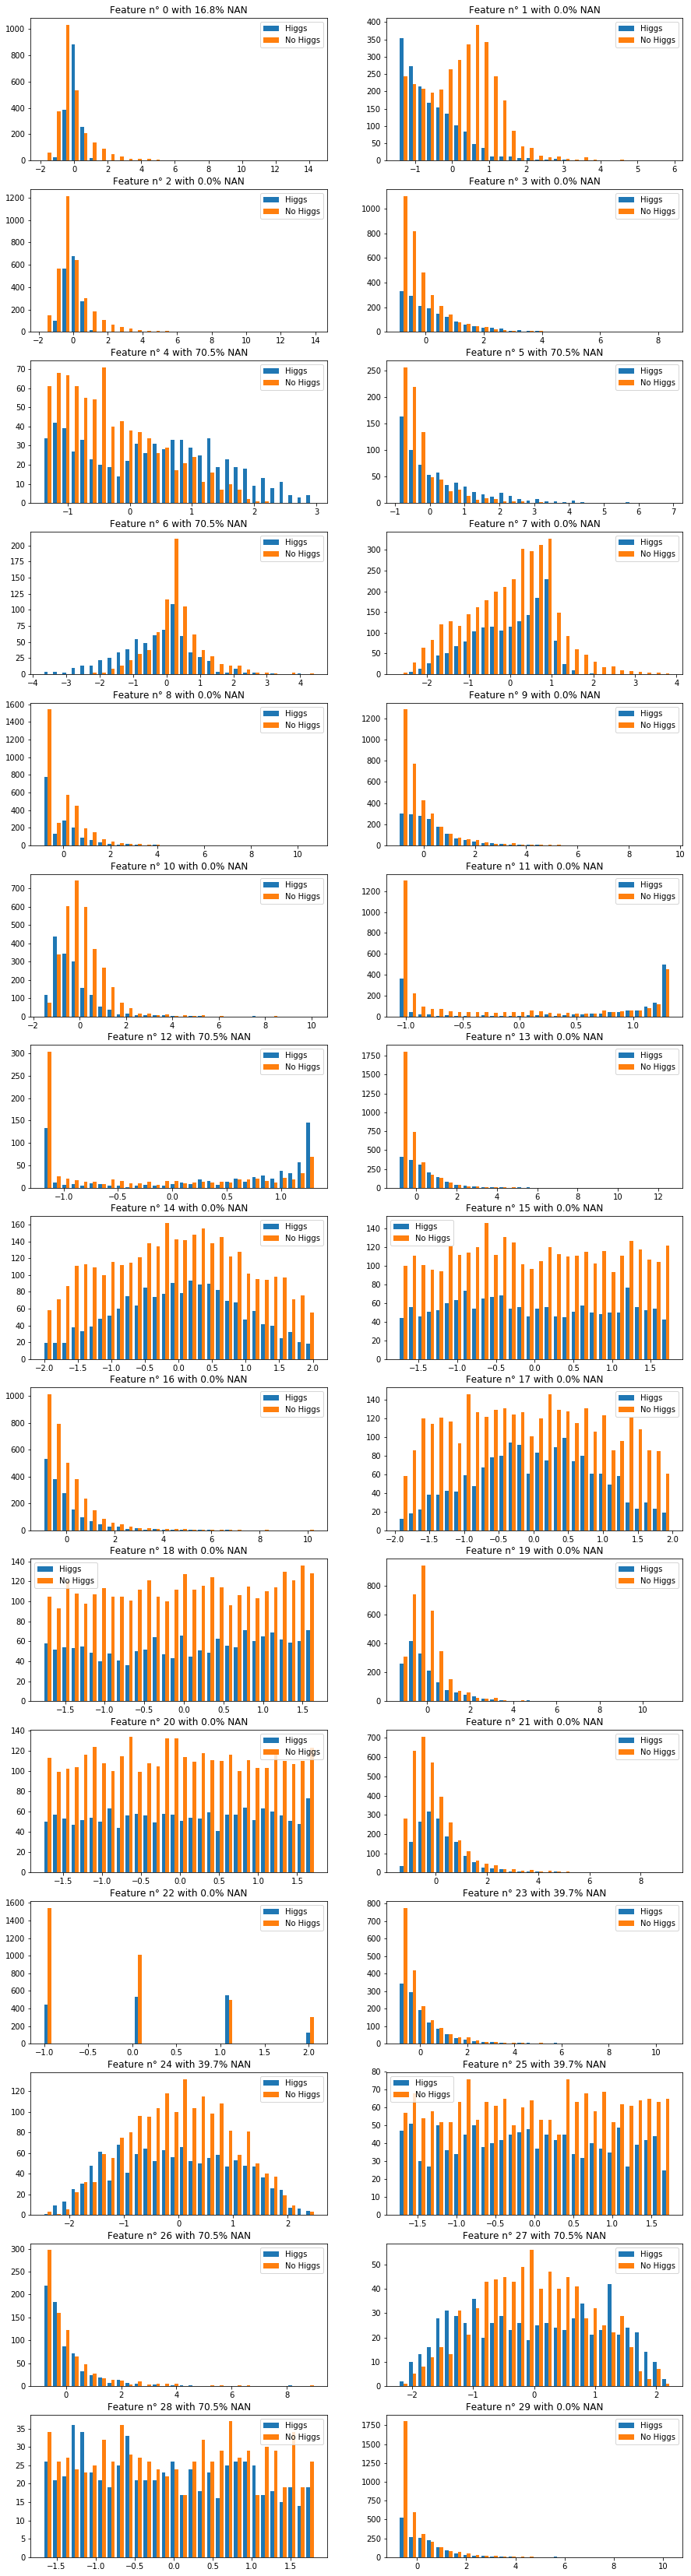

In [9]:
display_feature_distribution(y, tx_nan_norm, 30)

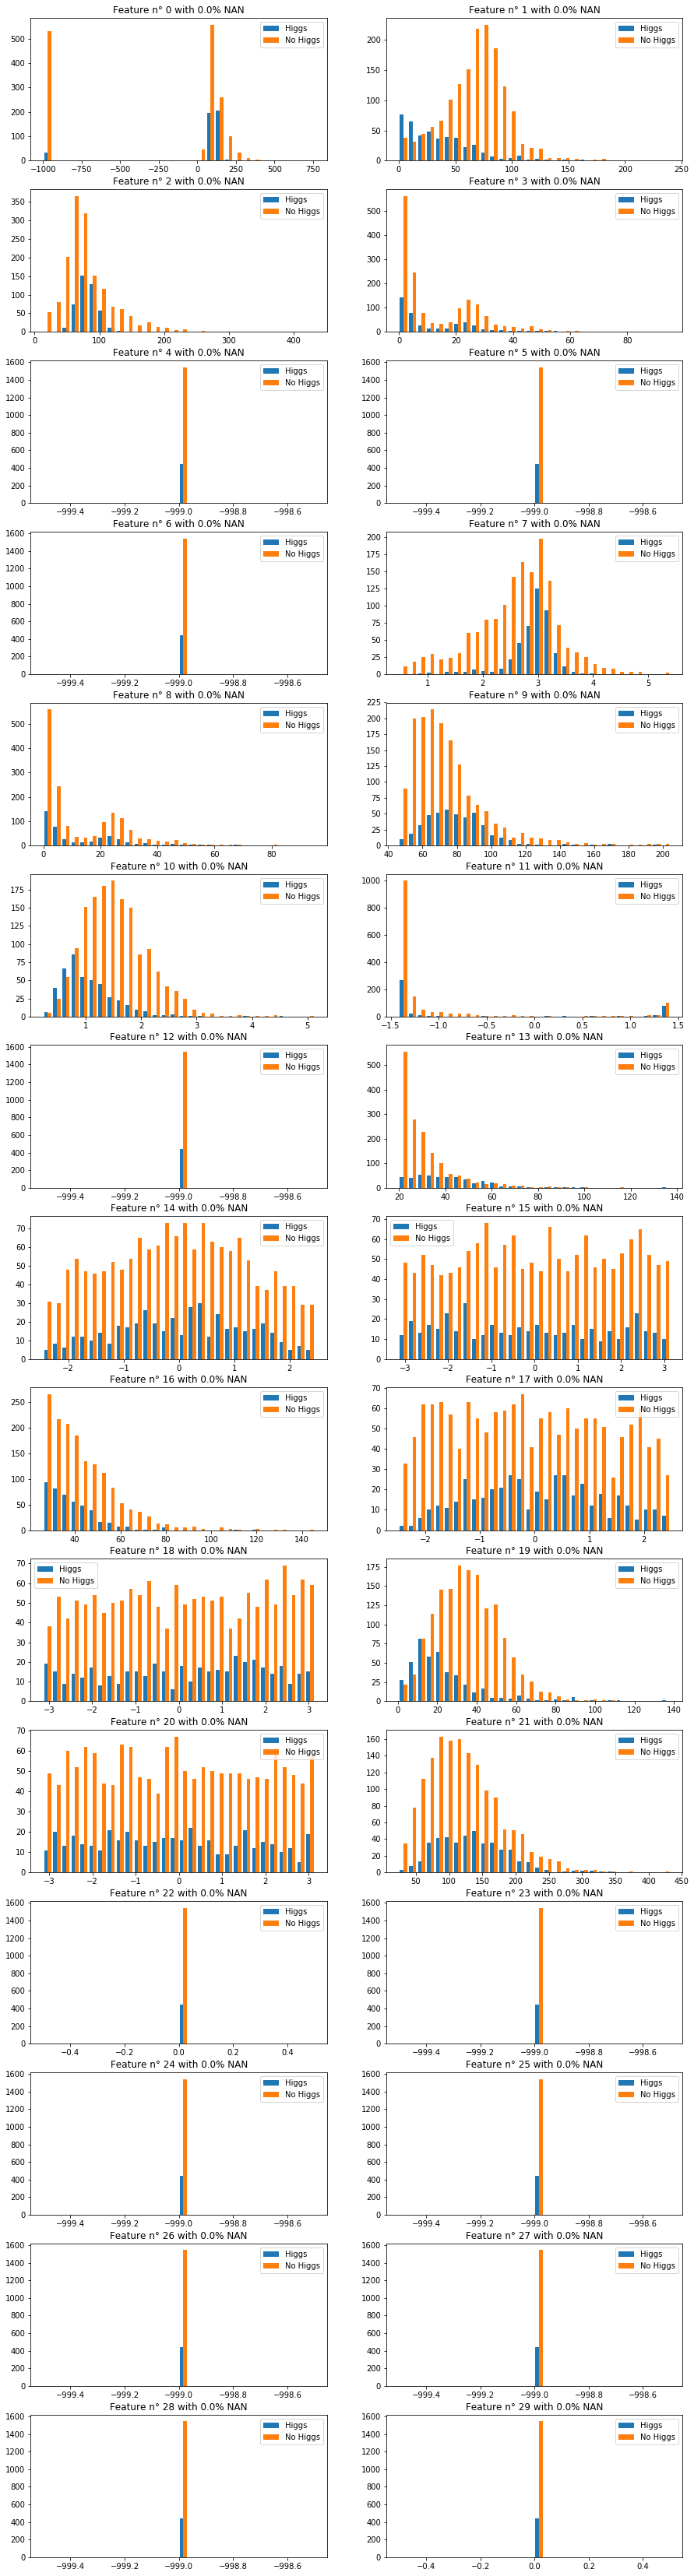

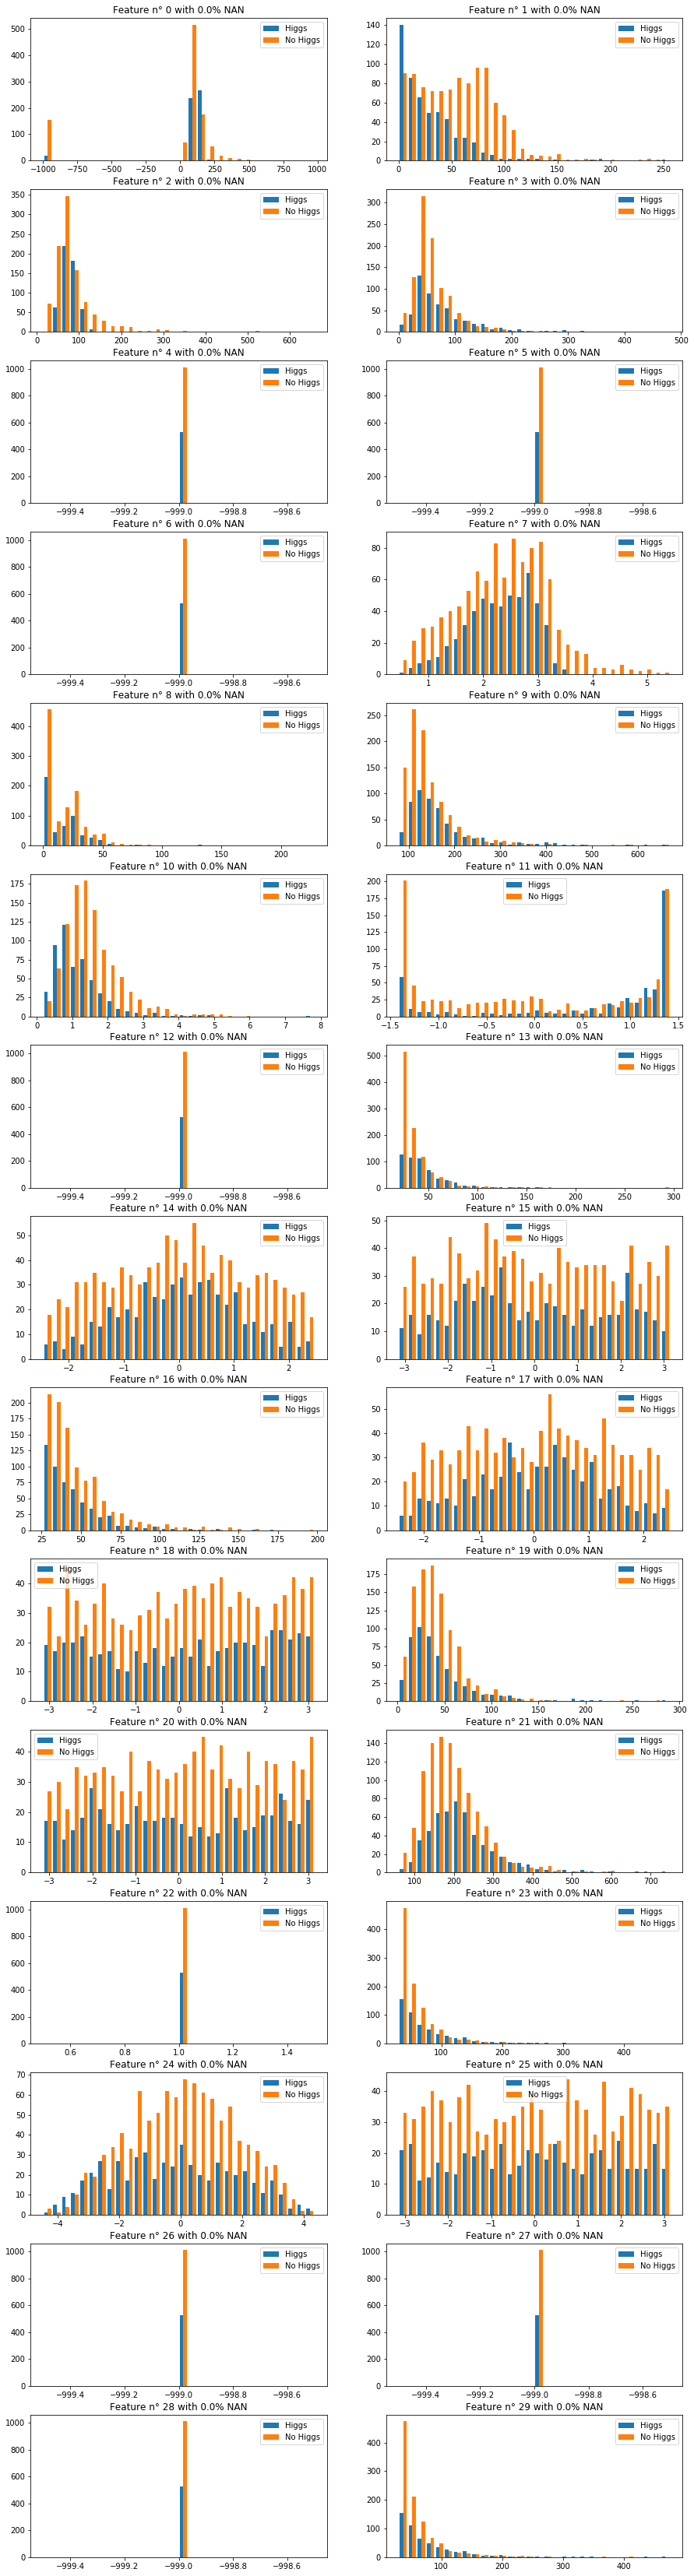

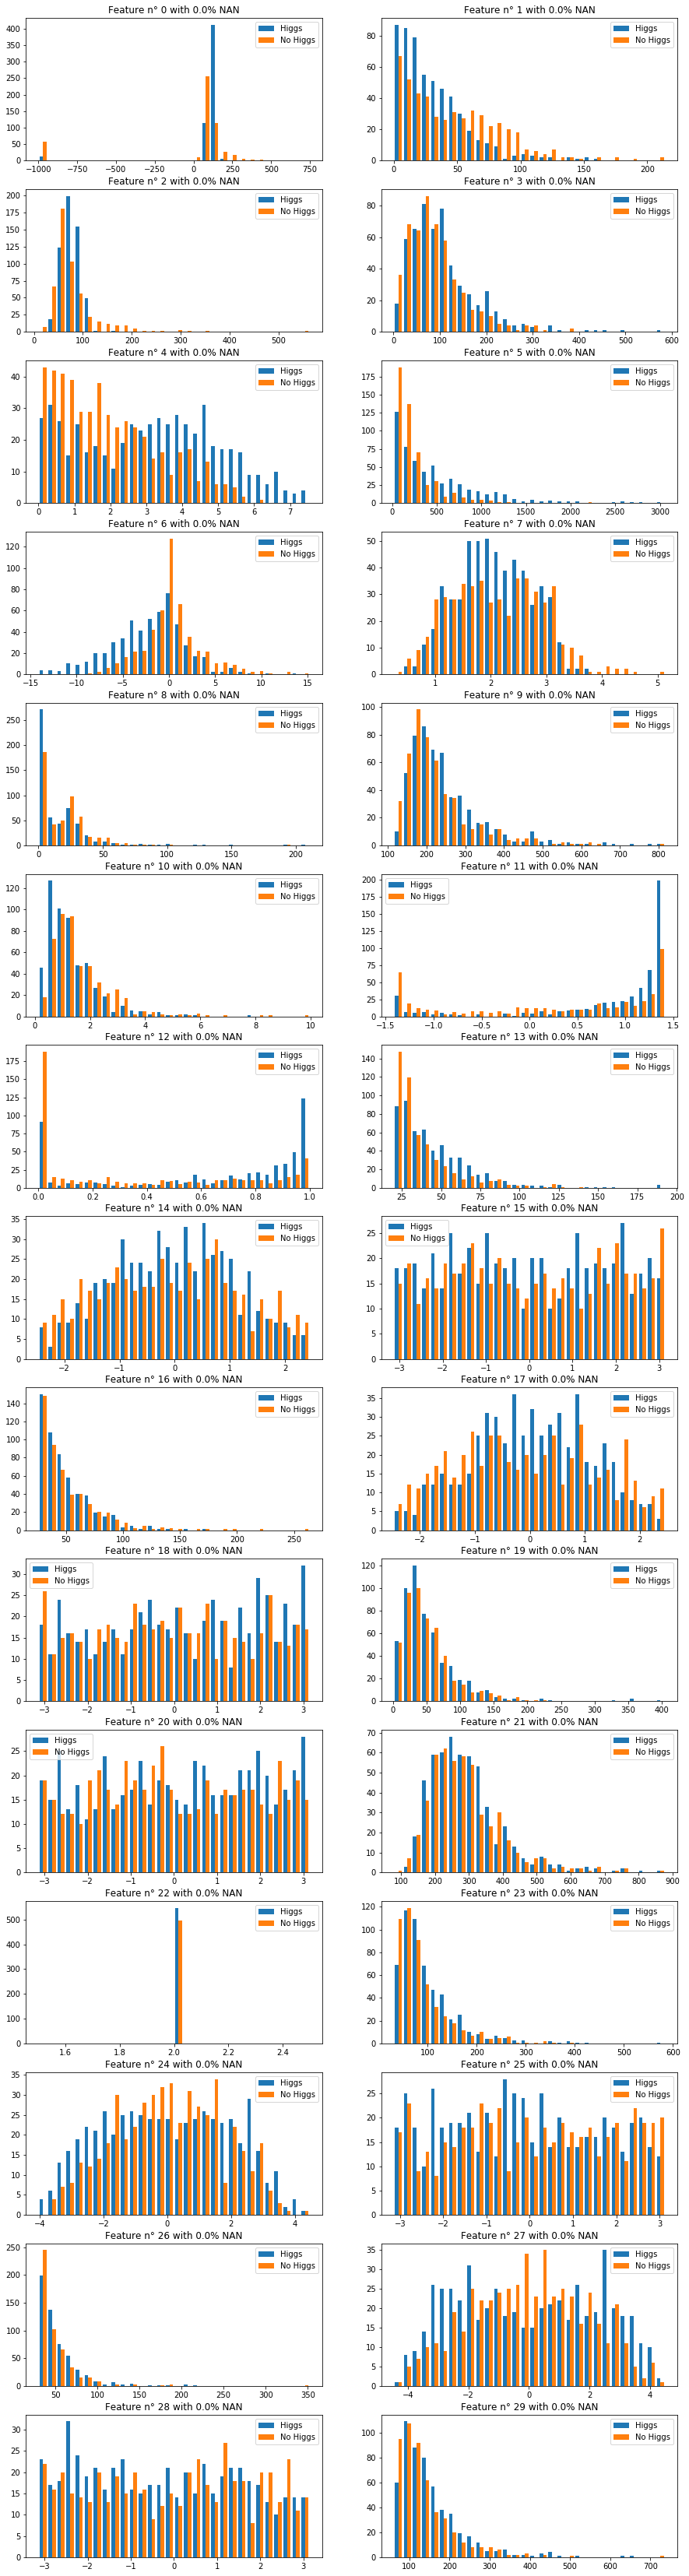

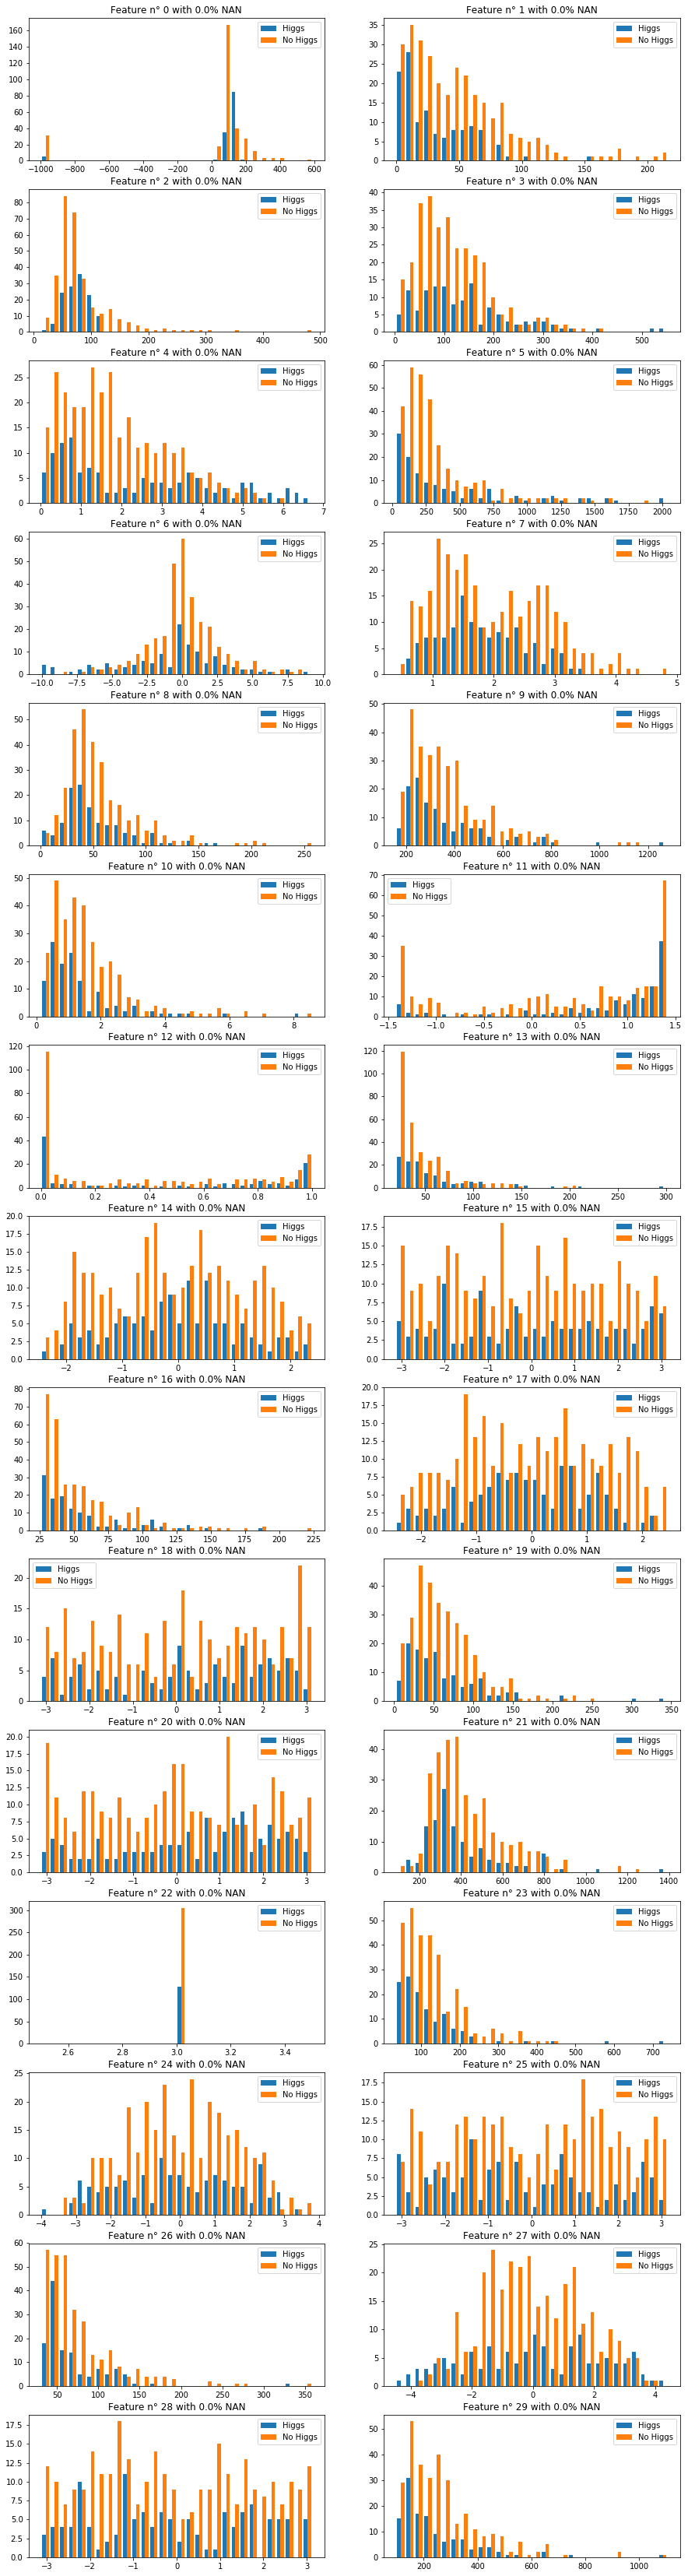

In [18]:
#feature distribution for the different groups tx0, tx1, tx2 and tx3
display_feature_distribution(y0, tx0, 30)
display_feature_distribution(y1, tx1, 30)
display_feature_distribution(y2, tx2, 30)
display_feature_distribution(y3, tx3, 30)

#### Missing Data

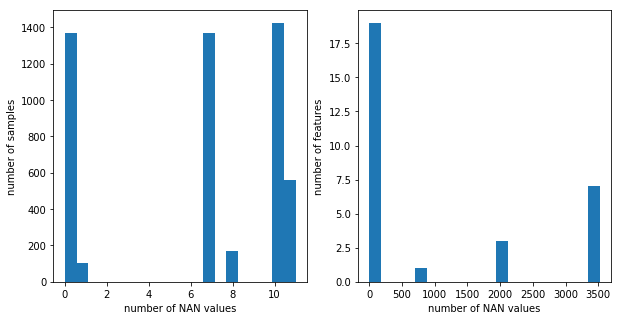

In [10]:
NAN_values_overview(tx_nan_norm, 20)

### Modify Feature Distribution 

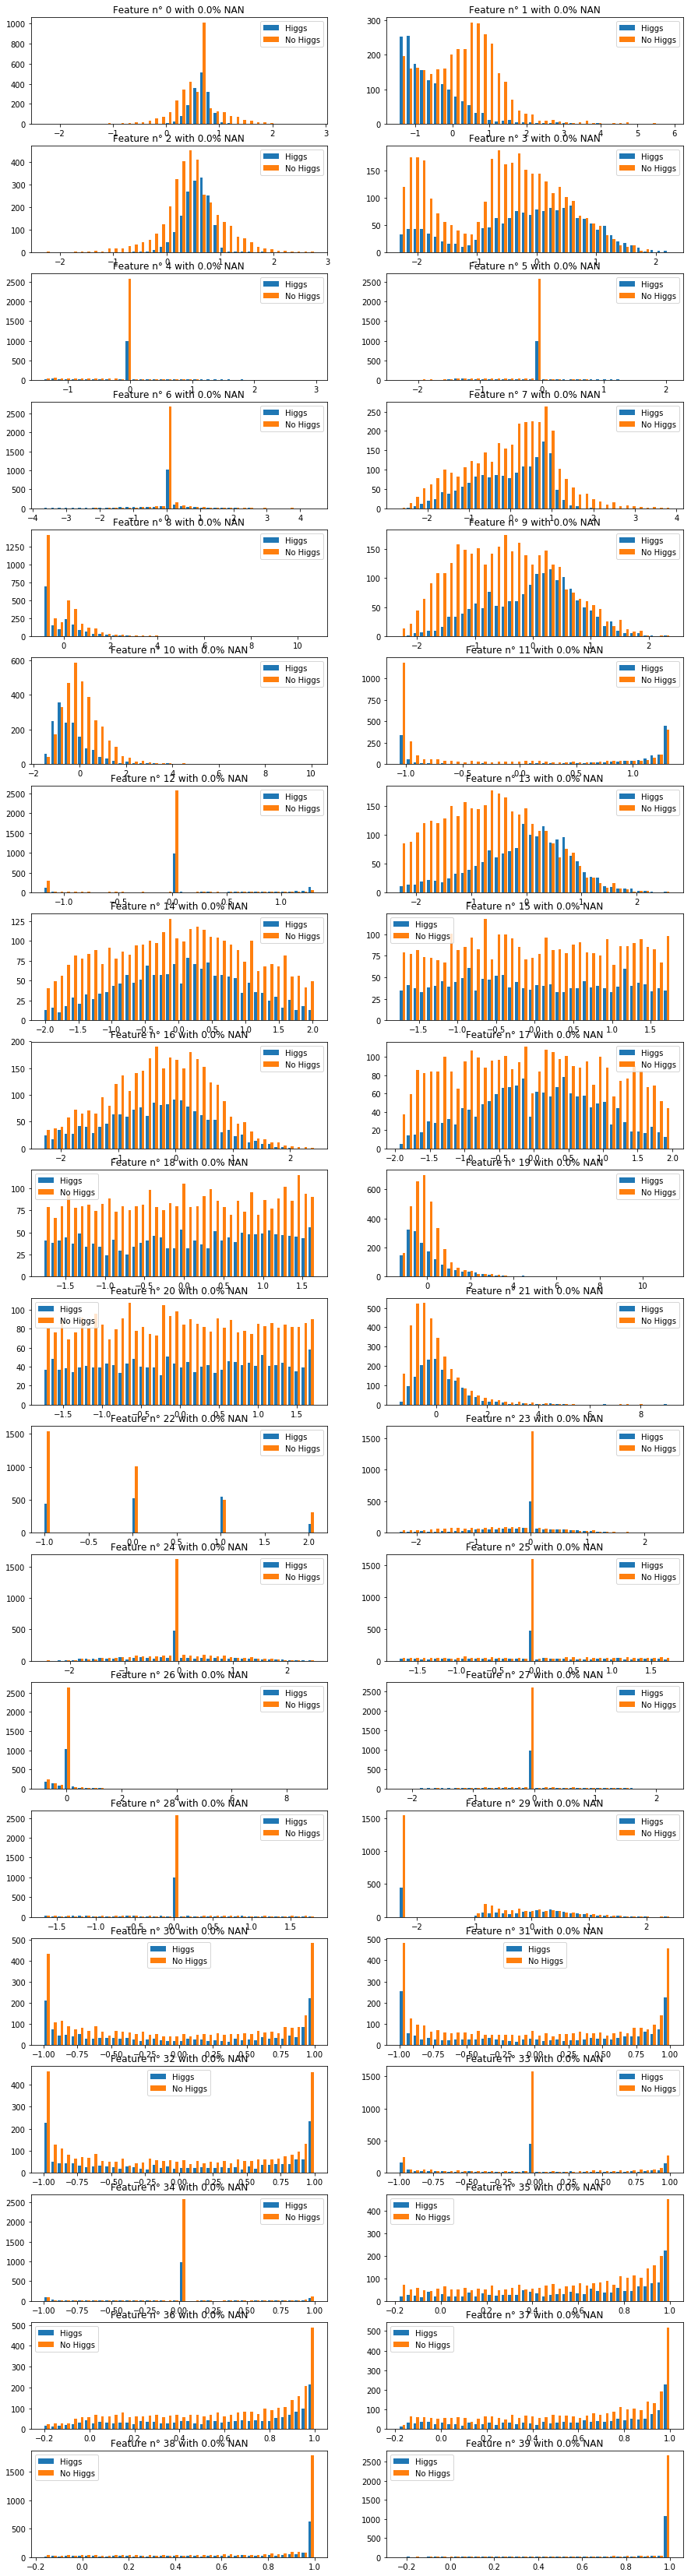

In [11]:
tx_0_norm = transform_nan_to_zero(tx_nan_norm)
features_log = [0, 2, 3, 5, 9, 13, 16, 23, 29]
features_sin_cos = [15, 18, 20, 25, 28]

tx_0_norm_adujsted_log = transform_feature_log(tx_0_norm, features_log)
tx_0_norm_adujsted_log_sin = transform_feature_sin(tx_0_norm_adujsted_log, features_sin_cos)
tx_0_norm_adujsted_log_sin_cos = transform_feature_cos(tx_0_norm_adujsted_log_sin, features_sin_cos)

txx = tx_0_norm_adujsted_log_sin_cos
display_feature_distribution(y, txx, 40)

### Clean Dataset

With a first glance at the data set we see that some features are almost entirely filled with missing data. Lets say the we remove features and samples with more thant 30% of missing values

In [12]:
tx_nan_norm.shape
txx.shape

(5000, 40)

In [13]:
#tx_cleaned = tx_nan_norm[:, ~np.isnan(tx_nan_norm).any(axis=0)]
#tx_cleaned.shape

(5000, 19)



### Train model 

#### Create Cross-validation datasets

In [19]:
test_indices, train_indices = create_cross_validation_datasets(tx.shape[0],4)

#### Least Square Gradient Descent
Linear regression using gradient descent

In [31]:
#l = nb lignes in x and c = nb columns in x
(l, c) = np.shape(txx)
#initialise le w initial à n dim à 0
initial_w_gd = np.zeros(c)
max_iters = 100
gamma = 0.25
gd_losses, gd_ws = gradient_descent(y, txx, initial_w_gd, max_iters, gamma)

Gradient Descent(0/99): loss=1.0, w0=-0.04179268796602373, w1=-0.08378602898962993
Gradient Descent(1/99): loss=0.7286610848698903, w0=-0.00851760512171433, w1=-0.10301242010355612
Gradient Descent(2/99): loss=0.8538455827324142, w0=-0.028295156652876803, w1=-0.14532113803750227
Gradient Descent(3/99): loss=0.6904120129030497, w0=-0.00019200899504020347, w1=-0.14819711969386754
Gradient Descent(4/99): loss=0.7937188599435065, w0=-0.014972947332762408, w1=-0.17419904793246635
Gradient Descent(5/99): loss=0.6761922368436195, w0=0.006080271405765551, w1=-0.1732394959004403
Gradient Descent(6/99): loss=0.7594890624454703, w0=-0.005532393835648502, w1=-0.19148964751473815
Gradient Descent(7/99): loss=0.6706033460536049, w0=0.010201534999000044, w1=-0.19008886708795517
Gradient Descent(8/99): loss=0.7369030586201895, w0=0.0011910194160044893, w1=-0.20375665812589963
Gradient Descent(9/99): loss=0.669247596396281, w0=0.013071590905480594, w1=-0.20271998486757212
Gradient Descent(10/99): loss=

#### Least Square Stochastic Gradient Descent
Linear regression using stochastic gradient descent

In [39]:
#l = nb lignes in x and c = nb columns in x
(l, c) = np.shape(txx)
#initialise le w initial à 30 dim à 0
initial_w_sgd = np.zeros(c)
max_iters_sgd = 100
gamma_sgd = 0.04
sgd_losses, sgd_ws = stochastic_gradient_descent(y, txx, initial_w_sgd,10,  max_iters_sgd, gamma_sgd)

SGD(0/99): loss=0.4181526061569083, w0=-0.022037417947067414, w1=-0.009571679585285752
SGD(1/99): loss=0.41733898935854014, w0=-0.029745126808434347, w1=-0.005665841602716777
SGD(2/99): loss=0.40418746228752317, w0=-0.03181952820089509, w1=-0.005564196226717914
SGD(3/99): loss=0.3943544597380096, w0=-0.02994595112570822, w1=-0.017293082466461843
SGD(4/99): loss=0.3988784825003258, w0=-0.02296182638803267, w1=-0.019228678215195333
SGD(5/99): loss=0.4030232619764443, w0=-0.023894077871460643, w1=-0.026474171189658755
SGD(6/99): loss=0.3918034783362262, w0=-0.024397847830043323, w1=-0.025823669302153438
SGD(7/99): loss=0.39430091724865146, w0=-0.017967242932703294, w1=-0.026876928750279815
SGD(8/99): loss=0.4012663450344174, w0=-0.015864908559209075, w1=-0.011716637678681297
SGD(9/99): loss=0.4014414694516887, w0=-0.009473618793849975, w1=-0.029666583939353723
SGD(10/99): loss=0.39269796237191995, w0=-0.024877177261182958, w1=-0.022566402162890874
SGD(11/99): loss=0.39117437938081073, w0=

#### Least Square
Least squares regression using normal equations

In [40]:
weight = least_squares(y, txx)
losses = compute_loss(y, txx, weight)
print("weights : {0}".format(weight))
print("losses : {0}".format(losses))

weights : [ 0.11051554 -0.2568357  -0.32113174 -0.07081299  0.49652604 -0.49102522
 -0.04901669  0.1770458   0.01579191  0.03954131  0.10391632  0.12438019
  0.13730787  0.36100783  0.00545586 -0.01328455  0.03348455  0.02539963
 -0.07338907  0.06837654 -0.03006469 -0.0847102  -0.21784139  0.04543065
 -0.03770506  0.0166237   0.06115731  0.00725961 -0.06214666  0.19787683
  0.01367538  0.11984668  0.03025817 -0.02170751  0.06292839 -0.00616231
 -0.01642778  0.00290473  0.05202917  0.00379839]
losses : 0.32201628761540085


#### Ridge Regression
Ridge regression using normal equations

In [41]:
#for different lambdas
lambdas = np.logspace(-100, 100, 200);
#ridge reggression for different lambda
losses = []
for index, lambda_ in enumerate(lambdas):
    weight = ridge_regression(y, txx, lambda_)
    losses.append(compute_loss(y, txx, weight))
print(losses)

[0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.3220162876

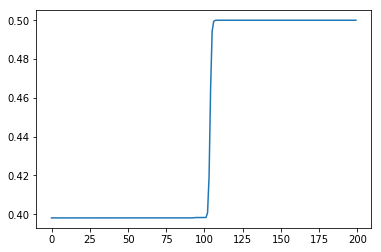

In [64]:
plt.plot(list(range(len(losses))), losses)
plt.show()

#### Logistic Regression
Logistic regression using gradient descent or SGD

#### Reg Logistic Regression
Regularized logistic regression using gradient descent
or SGD